***Name : S.SANJTIH***

***ID NO : 190562G***

***Course Code : EN2550***
### INTRODUCTION TO NEURAL NETWORK
---

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

x_0 =  0.6 , alpha =  0.02 -->  x=  -2.4003994283530288 f(x) =  -53.118404837605
x_0 =  4 , alpha =  0.02 -->  x=  2.533858129759416 f(x) =  -9.083837308516742
x_0 =  4 , alpha =  0.0005 -->  x=  3.2465137986954424 f(x) =  4.090187304682885


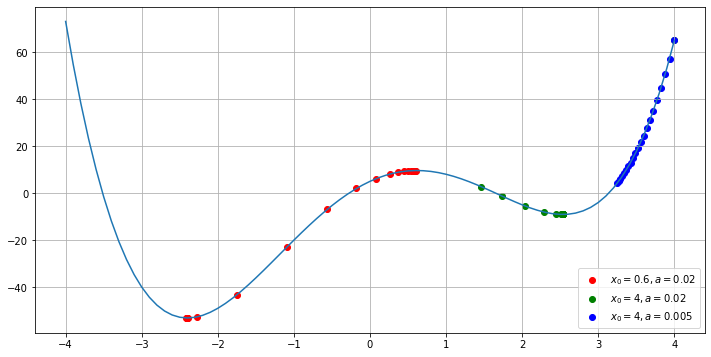

In [2]:
def f(x):
    A=np.array([1,-1,-12,15,5])
    X=np.array([x**(4-i) for i in range(5)])
    return A.T@X

def g(x):
    A = np.array([(4-i)*n for i,n in enumerate([1,-1,-12,15])])
    X = np.array([x**(3-i) for i in range(4)])
    return A.T@X

def gradiant_descent(x_0, alpha):
    x=x_0
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist= np.append(x_hist, x)
        fx_hist= np.append(fx_hist, f(x))
    
    # Verbose
    print("x_0 = ",x_0,", alpha = ",alpha,'-->  x= ',x,'f(x) = ',f(x))
    return x_hist,fx_hist

x_hist_1,fx_hist_1 = gradiant_descent(0.6,0.02)
x_hist_2,fx_hist_2 = gradiant_descent(4,0.02)
x_hist_3,fx_hist_3 = gradiant_descent(4,0.0005)


fig = plt.figure(figsize = (12,6))
ax = plt.subplot(1,1,1)
delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax.plot(x_,f(x_))
ax.scatter(x_hist_1,fx_hist_1, c='r', label = "$x_{0}=0.6 , a = 0.02$")
ax.scatter(x_hist_2,fx_hist_2, c='g', label = "$x_{0}=4, a = 0.02$")
ax.scatter(x_hist_3,fx_hist_3, c='b', label = "$x_{0}=4, a = 0.005$")
ax.grid(True)
plt.legend()
plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data( )
# ( x_train , y _ t r a i n ) , ( x _ t e s t , y _ t e s t ) = mnist . load_data ( )
print( "x_train => " , x_train.shape)

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr), : ]
x_test = x_test[range(Nte), :]
y_train = y_train[range(Ntr)]
y_test =y_test[range(Nte)]



# Utility function for displaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)


170498071/170498071 [==============================] - 115s 1us/step
x_train =>  (50000, 32, 32, 3)


In [5]:
K = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train,num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train/= 255.
x_test/= 255.

In [7]:
std = 1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs = 11
batch_size = 1000
loss_history = []
rng = np.random.default_rng(seed = 0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices] #Extract a bath of 100
        y = y_train[batch_indices]

        #Forward pass
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred - y).sum()
        loss_history.append(loss)

        #Backward pass
        dy_pred = 1./batch_size*2.0*(y_pred - y)
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w - lr*dw #dw is partial derivative of L with respect to w
        b = b - lr*db

    if e % 5 == 0:
        print('Iteration %d / %d: loss %f' %(e, epochs, loss))
    if e % 10 == 0:
        lr *= lr_decay

Iteration 0 / 11: loss 0.850468
Iteration 5 / 11: loss 0.836760
Iteration 10 / 11: loss 0.834913


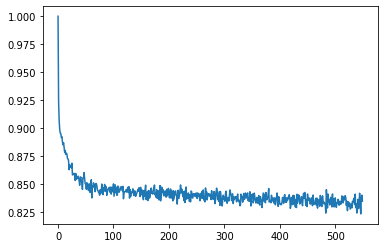

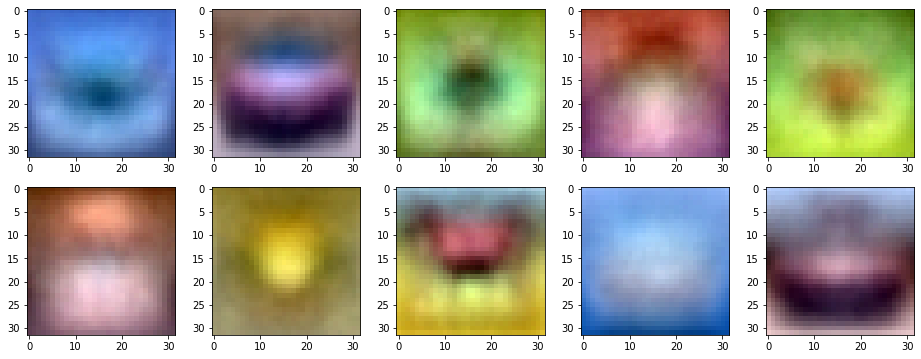

train_acc =  0.33572
test_acc =  0.3351


In [8]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True)